## Setup and Define Functions

In [1]:
# import all
import numpy as np
import xarray as xr

#from rhwhitepackages.regrid import *

import mpl_toolkits
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.ticker as mticker

# plotting
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
from cartopy.util import add_cyclic_point
import matplotlib.image as image

%matplotlib inline


# resize plots
matplotlib.rcParams['figure.figsize']=(20,5)
matplotlib.rcParams.update({'font.size':14})

In [2]:
# Read in elevation data
#elevdata = np.genfromtxt('/home/disk/eos4/rachel/data/distance_elevation-data.txt',delimiter=',',skip_header=1)
elevdata = np.genfromtxt('/home/disk/eos4/rachel/data/distance_elevation-data_neat1.csv',delimiter=',',skip_header=1)

lons = elevdata[:,1]
lats = elevdata[:,2]

elev = elevdata[:,3]
distance = elevdata[:,4]

print(distance)

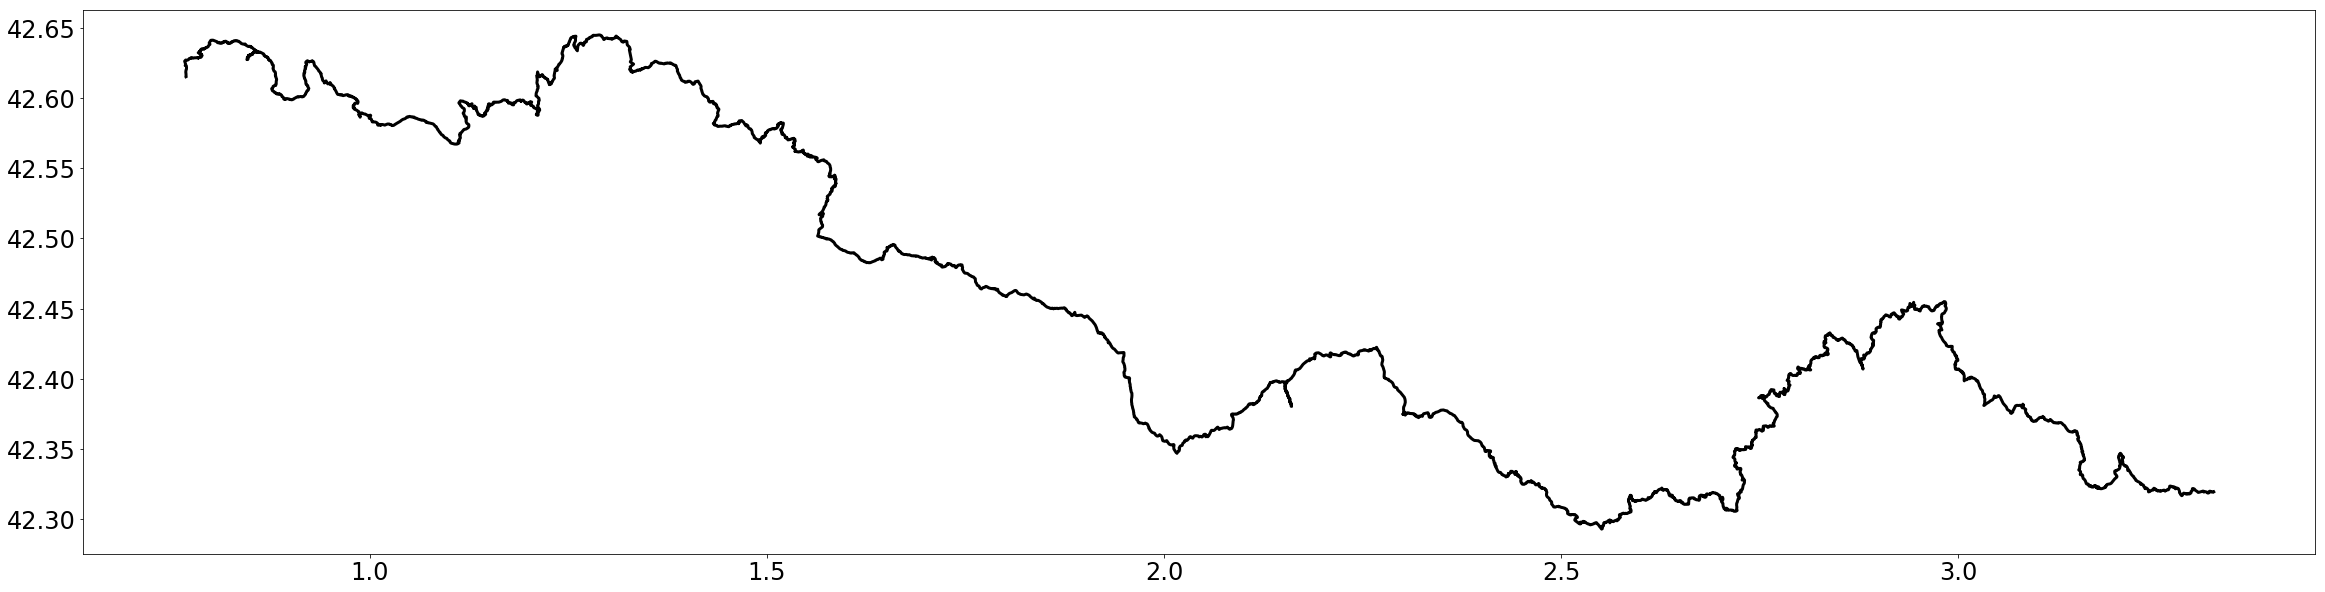

In [4]:
# Plot route to check
matplotlib.rcParams['figure.figsize']=(40,10)
matplotlib.rcParams.update({'font.size':24})

plt.plot(lats, lons,color='k',linewidth=3)


In [5]:
def plot_colourline(x,y,c,w=4):
    c = plt.cm.gist_earth((c-(np.min(c)*0.7))/((np.max(c)*1.2)-(np.min(c)*0.7)))
    ax = plt.gca()
    for i in np.arange(len(x)-1):
        ax.plot([x[i],x[i+1]], [y[i],y[i+1]], c=c[i],linewidth=w)
    return

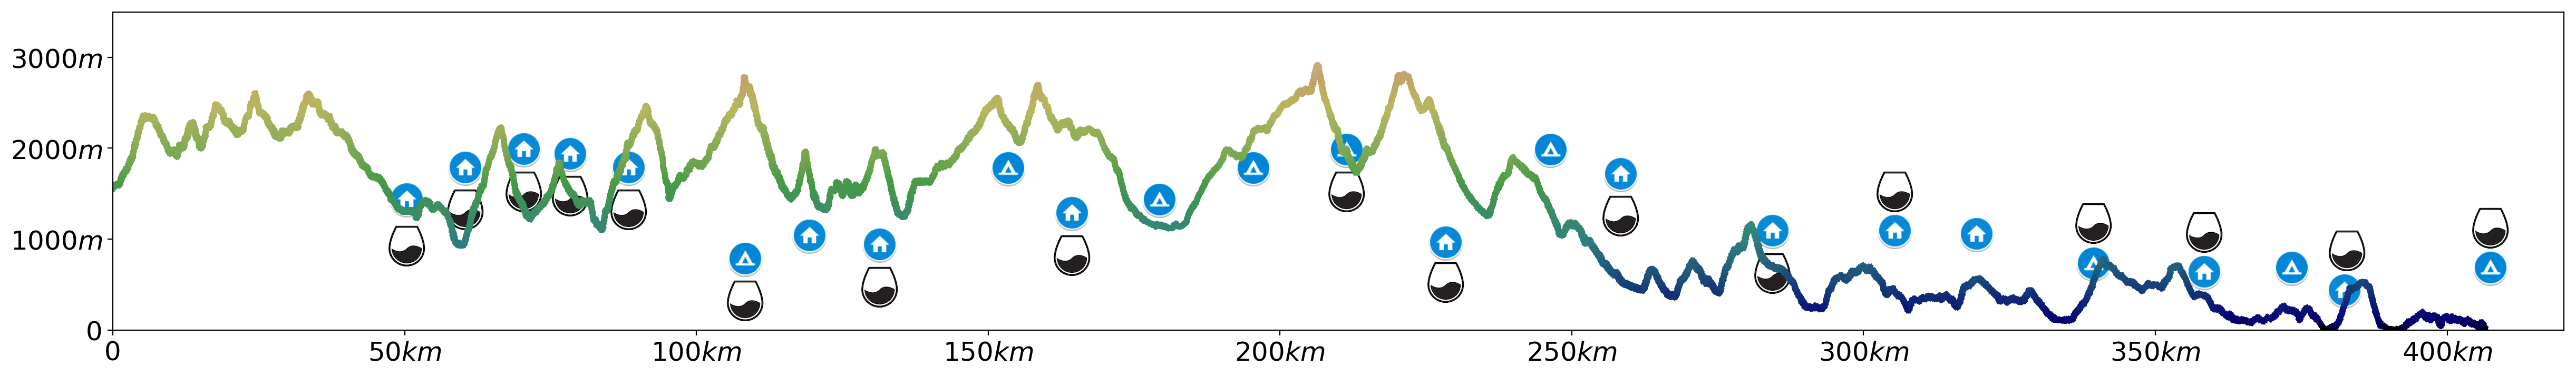

In [170]:
# plot 
plottents=True
plothuts=True
plotwine=True

matplotlib.rcParams['figure.figsize']=(30,4) #(40,4)
matplotlib.rcParams.update({'font.size':18})

dpi=200

fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(111)

colors = plt.cm.terrain(np.linspace(0,1,200))

#plt.plot(distance, elev,color='k',linewidth=4)

plot_colourline(distance,elev,elev,4)

plt.xlim(0,420)
plt.ylim(0,3500)

plt.xticks([0,50,100,150,200,250,300,350,400],
           [r'0',r'$50km$',r'$100km$',r'$150km$',r'$200km$',r'$250km$',r'$300km$',r'$350km$',r'$400km$'])
plt.yticks([0,1000,2000,3000],
           [r'0',r'$1000m$',r'$2000m$',r'$3000m$'])

xshift = 49
yshift = 50
# Plot wine glasses
if plotwine:
    im = image.imread('/home/disk/eos4/rachel/data/WineGlass2.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((-47+xshift,-37+xshift,-27+xshift,-19+xshift,-9+xshift,11+xshift,34+xshift,67+xshift,114+xshift,
                     131+xshift,161+xshift,187+xshift,208+xshift,242+xshift,261+xshift,285.5+xshift,
                     310+xshift,330.5+xshift,342.5+xshift),
                    (800+yshift,1200+yshift,1400+yshift,1350+yshift,1200+yshift,200+yshift,350+yshift,700+yshift,
                     1400+yshift,400+yshift,1130+yshift,500+yshift,1400+yshift,1050+yshift,950+yshift,750+yshift,
                     1000+yshift,750+yshift,260+yshift),
                    "bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen; only in trunk can you put the image on top of the plot, see this link:
    # http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg14534.html
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")

# Plot tents 
if plottents:
    im = image.imread('/home/disk/eos4/rachel/data/Tent_icon.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((11+xshift,56+xshift,82+xshift,98+xshift,114+xshift,149+xshift,242+xshift,276+xshift,
                     310+xshift,352+xshift),
                    (650+yshift,1650+yshift,1300+yshift,1650+yshift,1850+yshift,1850+yshift,600+yshift,
                     550+yshift,550+yshift,300+yshift),"bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen only in trunk can you put the image on top of the plot, see this link:
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")

# Plot huts 
if plothuts:
    im = image.imread('/home/disk/eos4/rachel/data/Hut_icon.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((-47+xshift,-37+xshift,-27+xshift,-19+xshift,-9+xshift,22+xshift,34+xshift,67+xshift,
                     131+xshift,161+xshift,187+xshift,208+xshift,222+xshift,261+xshift,285+xshift,330+xshift),
                    (1300+yshift,1650+yshift,1850+yshift,1800+yshift,1650+yshift,900+yshift,800+yshift,1150+yshift,
                     825+yshift,1580+yshift,950+yshift,950+yshift,920+yshift,500+yshift,300+yshift,300+yshift),
                    "bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen only in trunk can you put the image on top of the plot, see this link:
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper",alpha=10)

# Plot cava bottle
if plotwine:
    im = image.imread('/home/disk/eos4/rachel/data/Cava_colour2.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((365+xshift),
                    (800+yshift),
                    "bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen; only in trunk can you put the image on top of the plot, see this link:
    # http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg14534.html
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")
        
        
plt.savefig('/home/disk/eos4/rachel/data/elevation_wine2.png', dpi=200, facecolor='w', edgecolor='w')
        #orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)

plt.savefig('/home/disk/eos4/rachel/data/elevation_wine2.jpg', dpi=200, facecolor='w', edgecolor='w')
        #orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)

plt.show()